In [33]:
import numpy as np 
import pandas as pd 
import string 
import spacy 

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline


In [3]:
afinn = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1')
afinn.shape 

(2477, 2)

In [4]:
afinn.head() 

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [15]:
amazon=pd.read_csv("amazon1.txt",error_bad_lines=False)

b'Skipping line 555: expected 14 fields, saw 16\nSkipping line 956: expected 14 fields, saw 19\nSkipping line 1890: expected 14 fields, saw 19\nSkipping line 1903: expected 14 fields, saw 17\nSkipping line 2837: expected 14 fields, saw 32\nSkipping line 2845: expected 14 fields, saw 21\nSkipping line 2850: expected 14 fields, saw 31\nSkipping line 2862: expected 14 fields, saw 19\nSkipping line 2865: expected 14 fields, saw 19\nSkipping line 2868: expected 14 fields, saw 17\nSkipping line 2870: expected 14 fields, saw 21\nSkipping line 2872: expected 14 fields, saw 17\nSkipping line 2873: expected 14 fields, saw 21\nSkipping line 2876: expected 14 fields, saw 17\nSkipping line 2878: expected 14 fields, saw 16\nSkipping line 2912: expected 14 fields, saw 66\nSkipping line 3672: expected 14 fields, saw 17\nSkipping line 3674: expected 14 fields, saw 17\nSkipping line 4333: expected 14 fields, saw 16\nSkipping line 5018: expected 14 fields, saw 20\nSkipping line 5660: expected 14 fields, 

In [17]:
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(amazon))
sentences[0:15] 

['This product so far has not disappointed.',
 'My children love to use it and I like the ability to monitor control what content they see with ease.great for beginner or experienced person.',
 'Bought as a gift and she loves it.Inexpensive tablet for him to use and learn on  step up from the NABI.',
 "He was thrilled with it  learn how to Skype on it already.I've had my Fire HD 8 two weeks now and I love it.",
 'This tablet is a great value.We are Prime Members and that is where this tablet SHINES.',
 'I love being able to easily access all of the Prime content as well as movies you can download and watch laterThis has a 1280/800 screen which has some really nice look to it its nice and crisp and very bright infact it is brighter then the ipad pro costing $900 base model.',
 'The build on this fire is INSANELY AWESOME running at only 7.7mm thick and the smooth glossy feel on the back it is really amazing to hold its like the futuristic tab in ur hands.I bought this for my grand daught

In [18]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df 

,sentence
0,This product so far has not disappointed.
1,My children love to use it and I like the abil...
2,Bought as a gift and she loves it.Inexpensive ...
3,He was thrilled with it learn how to Skype on...
4,This tablet is a great value.We are Prime Memb...
5,I love being able to easily access all of the ...
6,The build on this fire is INSANELY AWESOME run...
7,I set it up with her as the user entered her ...
8,Simple to do and she loves the capabilities.
9,I also bought and installed a 64gig SD card wh...


In [19]:
affinity_scores = afinn.set_index('word')['value'].to_dict() 

In [20]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score 

In [21]:
# test that it works
calculate_sentiment(text = 'like') 

2

In [22]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment) 

In [23]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df['word_count'].head(10) 

0     7
1    25
2    21
3    24
4    16
5    53
6    47
7    32
8     8
9    17
Name: word_count, dtype: int64

In [24]:
sent_df 

,sentence,sentiment_value,word_count
0,This product so far has not disappointed.,-2,7
1,My children love to use it and I like the abil...,7,25
2,Bought as a gift and she loves it.Inexpensive ...,5,21
3,He was thrilled with it learn how to Skype on...,8,24
4,This tablet is a great value.We are Prime Memb...,3,16
5,I love being able to easily access all of the ...,11,53
6,The build on this fire is INSANELY AWESOME run...,7,47
7,I set it up with her as the user entered her ...,0,32
8,Simple to do and she loves the capabilities.,3,8
9,I also bought and installed a 64gig SD card wh...,0,17


In [25]:
sent_df.sort_values(by='sentiment_value').tail(10) 

,sentence,sentiment_value,word_count
6,The build on this fire is INSANELY AWESOME run...,7,47
17,It took some time to get books from my previou...,7,38
1,My children love to use it and I like the abil...,7,25
23,good bargain I really like this tablet.,7,7
3,He was thrilled with it learn how to Skype on...,8,24
14,They loved it and how easy they are to use wit...,8,19
21,Thank youAnd silk works wonders.Got it as a pr...,11,29
5,I love being able to easily access all of the ...,11,53
13,He had gotten me one a few years ago so I knew...,13,49
24,I would have given 5 stars but sometimes you h...,32,99


In [26]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe() 

count    26.000000
mean      5.692308
std       6.583429
min      -2.000000
25%       1.250000
50%       4.500000
75%       7.000000
max      32.000000
Name: sentiment_value, dtype: float64

In [27]:
# Sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0].head() 

,sentence,sentiment_value,word_count
0,This product so far has not disappointed.,-2,7
7,I set it up with her as the user entered her ...,0,32
9,I also bought and installed a 64gig SD card wh...,0,17
19,He can watch movies and play a few games.,0,9


In [28]:
sent_df[sent_df['sentiment_value']>=20].head() 

,sentence,sentiment_value,word_count
24,I would have given 5 stars but sometimes you h...,32,99


In [29]:
sent_df['index']=range(0,len(sent_df)) 

C:\Users\bhavy\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

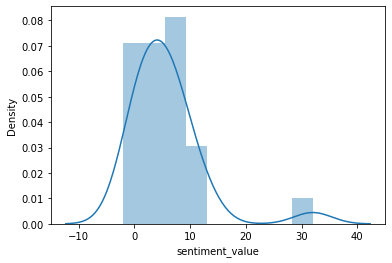

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(sent_df['sentiment_value']) 

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

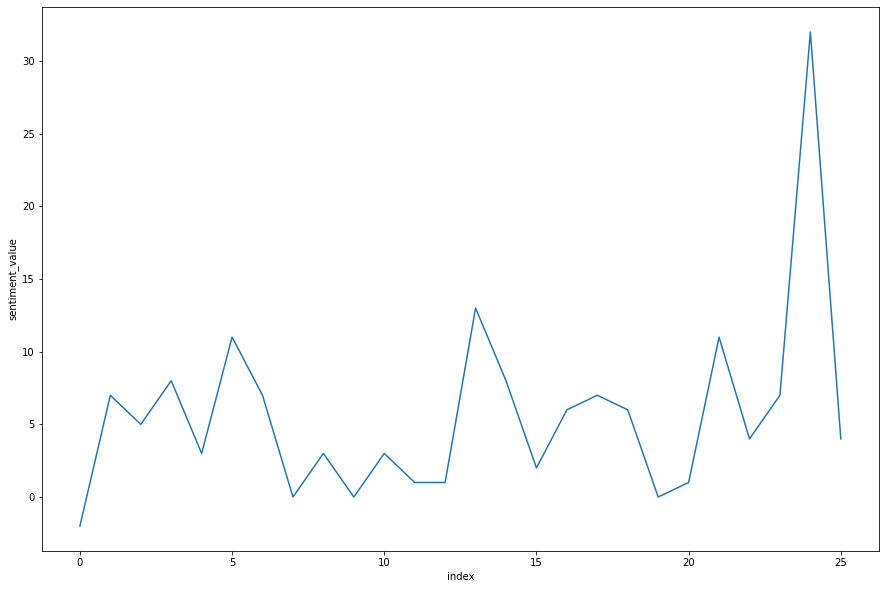

In [31]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df) 

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

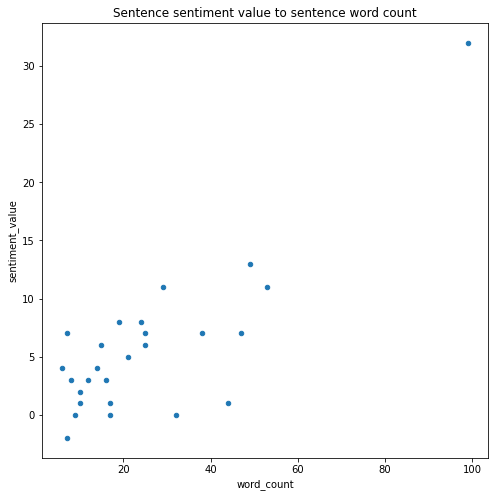

In [32]:
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')